In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
medical_charges_url = 'medical.csv'

In [3]:
medical_df = pd.read_csv('medical.csv')
medical_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_df.loc[:, 'smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(medical_df,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age'
                   )
fig.update_layout(bargap = 0.1)
fig.show()

In [11]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df,
                   x = 'charges', 
                   marginal= 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title= 'Annual medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df,
                   x = 'sex', 
                   marginal= 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title= 'Annual medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [14]:
fig = px.histogram(medical_df,
                   x = 'region', 
                   marginal= 'box',
                   color = 'smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title= 'Annual medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df,
                   x='charges', 
                   color='smoker',
                   facet_row='sex',  # Facet by sex (rows)
                   facet_col='region',  # Facet by region (columns)
                   marginal='box',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges by Sex, Region, and Smoking Status')

fig.update_layout(bargap=0.1)
fig.show()

In [16]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [17]:
px.histogram(medical_df, x = 'smoker', color = 'sex', title= 'smoker')

In [18]:
px.histogram(medical_df, x = 'smoker', color = 'region', title= 'region')

In [19]:
px.histogram(medical_df, x = 'smoker', color = 'children', title= 'childern')

In [20]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex', 'bmi','children'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [21]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [22]:
px.violin(medical_df, x = 'children', y='charges')

In [23]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [24]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [25]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [26]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [27]:
medical_df.charges.corr(smoker_numeric)


np.float64(0.7872514304984778)

In [28]:
sex_values = {'female': 0, 'male':1}
sex_numeric = medical_df.sex.map(sex_values)
medical_df.charges.corr(sex_numeric)

np.float64(0.05729206220202533)

In [29]:
num_df = medical_df[['age', 'bmi', 'children', 'charges']]
num_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


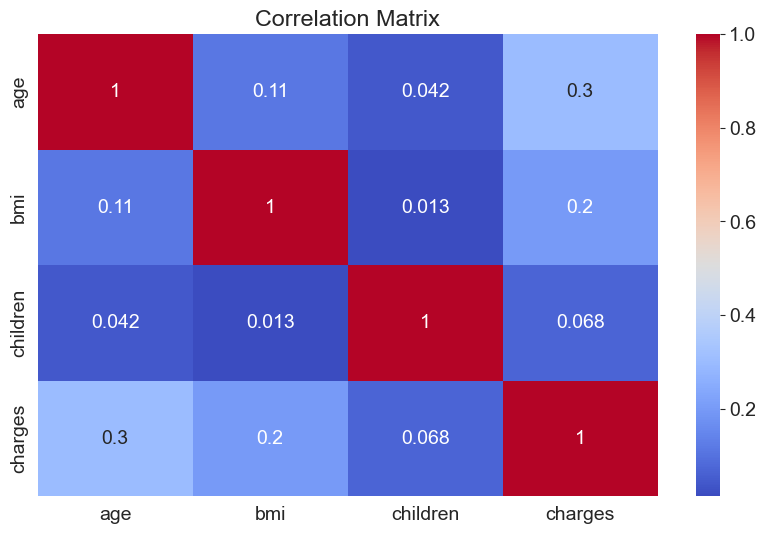

In [30]:
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix');

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [31]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


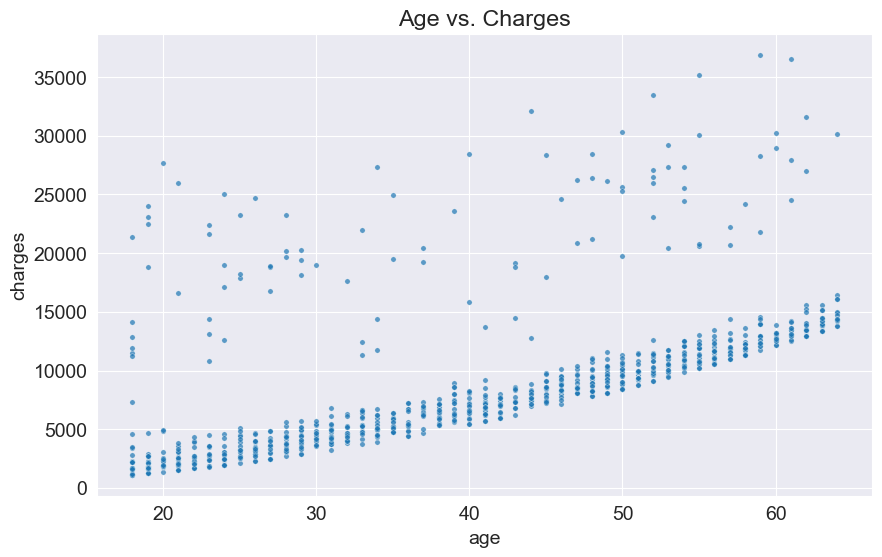

In [32]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x = 'age', y='charges', alpha = 0.7, s=15);

In [33]:
def estimate_charges(age, w , b):
    return w * age + b 

In [34]:
w = 50
b = 100

In [35]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)


In [36]:
non_smoker_df.charges.head(10)

1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
Name: charges, dtype: float64

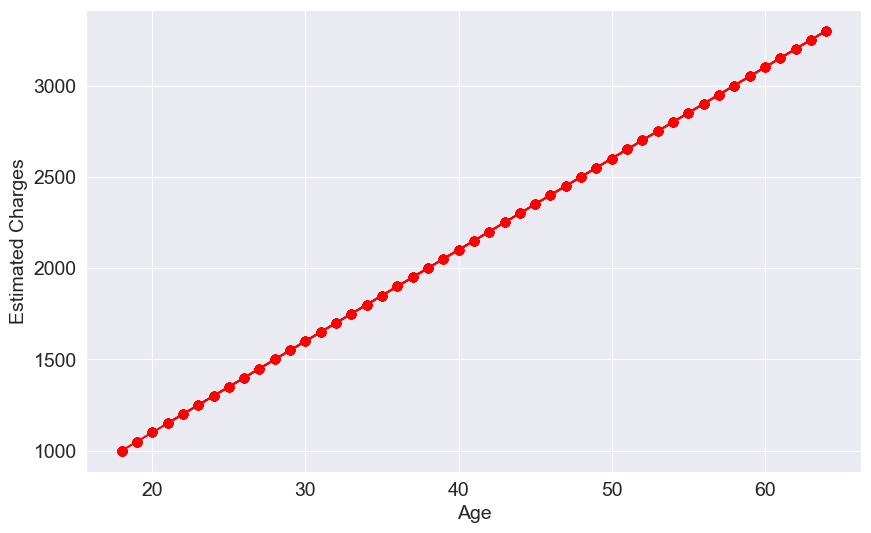

In [37]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

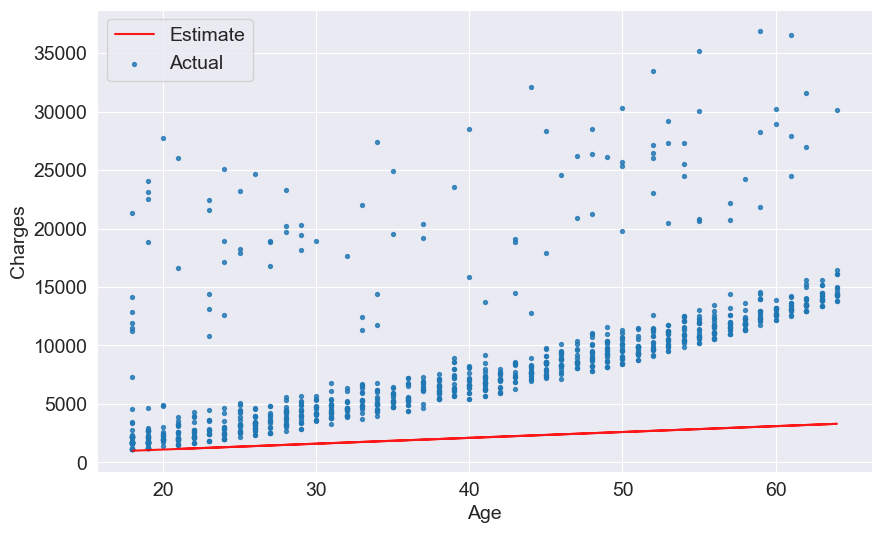

In [38]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9);
plt.scatter(ages, target, s = 8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate', 'Actual ']);

In [39]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w , b)
    
    plt.plot(ages, estimated_charges, 'r', alpha = 0.9);
    plt.scatter(ages, target, s = 8 , alpha= 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimator', 'Actual ']);

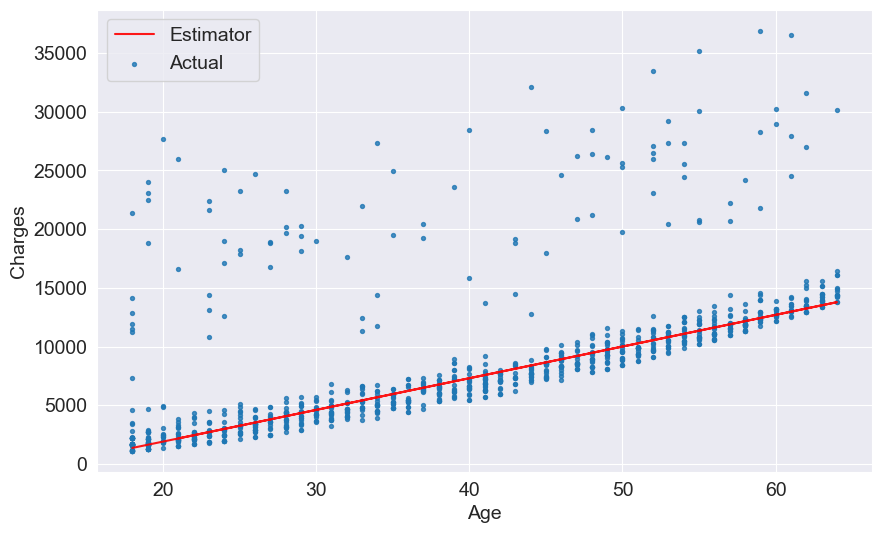

In [40]:
try_parameters(270,-3500)

In [41]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [42]:
targets = non_smoker_df['charges']
predicted = estimated_charges


In [43]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [44]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w ,b)
   
    
    plt.plot(ages, predictions, 'r', alpha = 0.9);
    plt.scatter(ages, target, s = 8 , alpha= 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['prediction', 'Actual ']);
    
    loss = rmse(target, predictions)
    print('RMSE Loss', loss)
    

RMSE Loss 4663.743689821927


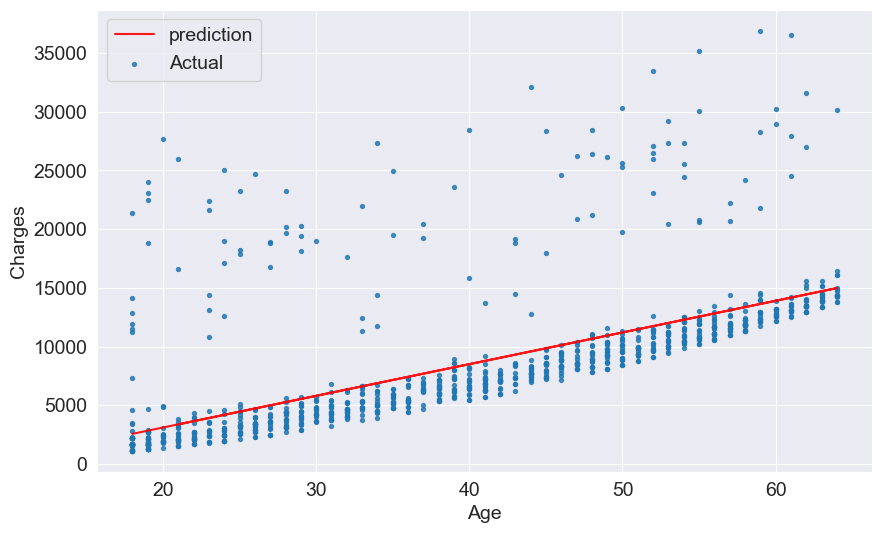

In [45]:
try_parameters(270, -2300)

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Doesn't it look similar to our own strategy of gradually moving the line closer to the points?


In [46]:
model = LinearRegression()

In [47]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [48]:
X = non_smoker_df[['age']]
y = non_smoker_df.charges
print('X.shape :' , X.shape)
print('y.shape :', y.shape)

X.shape : (1064, 1)
y.shape : (1064,)


In [49]:
model.fit(X, y)

LinearRegression()

In [50]:
model.predict(np.array([[23],
                       [37],
                       [61]]))

c:\Users\idree\Desktop\sklearn\env\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [51]:
predictions = model.predict(X)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [52]:
rmse(y , predictions)

np.float64(4662.505766636395)

In [53]:
model.coef_

array([267.24891283])

In [54]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss 4662.505766636395


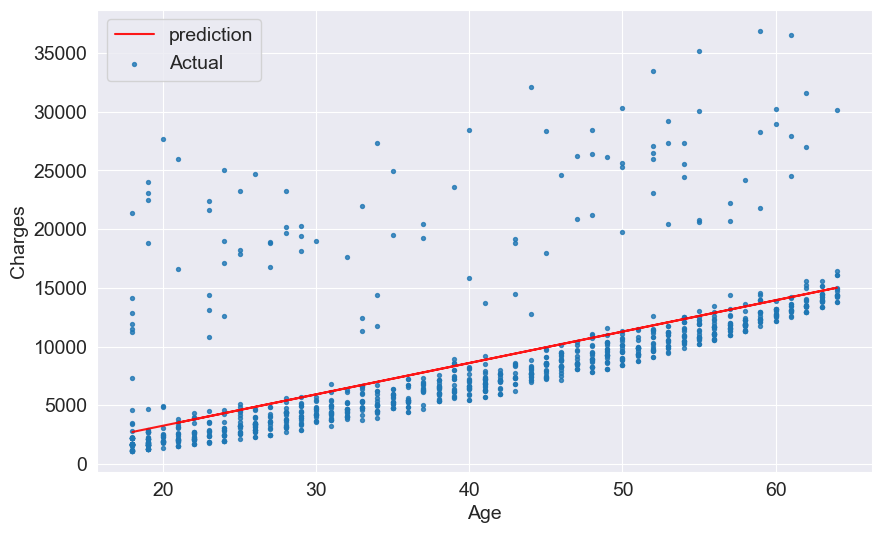

In [55]:
try_parameters(model.coef_, model.intercept_)

In [56]:
from sklearn.linear_model import SGDRegressor

In [57]:
mod = SGDRegressor()

In [58]:
mod.fit(X, y)

SGDRegressor()

In [59]:
mod.predict(np.array([[23], 
                        [37], 
                        [61]]))


c:\Users\idree\Desktop\sklearn\env\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 5304.7071101 , 11268.81868821, 21493.00996496])

In [60]:
pred = mod.predict(X)

In [61]:
rmse(y, pred)

np.float64(6446.816507297436)

In [62]:
mod.coef_

array([426.00796986])

In [63]:
mod.intercept_

array([-4493.4761968])

RMSE Loss 6446.816507297436


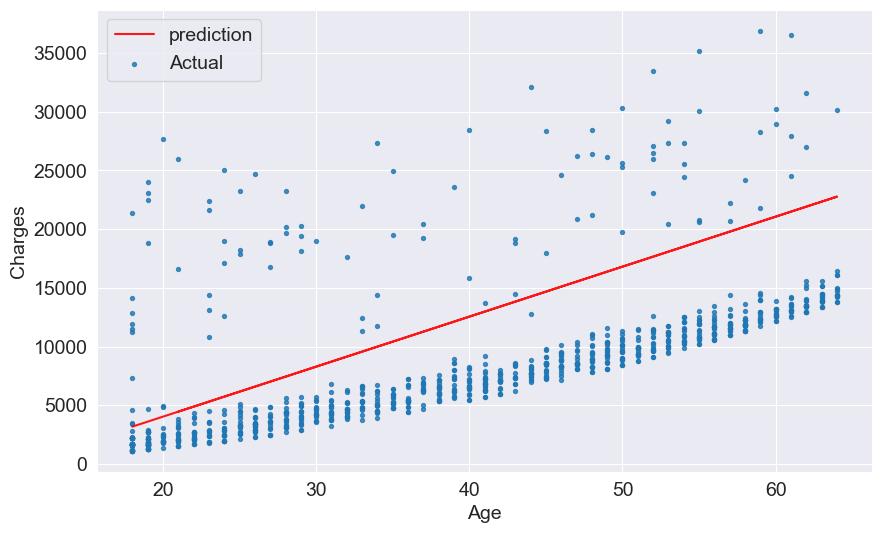

In [64]:
try_parameters(mod.coef_, mod.intercept_)

In [65]:
smoker_df =  medical_df[medical_df.smoker == 'yes']
smoker_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251


In [66]:
X1 = smoker_df[['age']]
y1 = smoker_df.charges
print('X.shape :' , X1.shape)
print('y.shape :', y1.shape)


X.shape : (274, 1)
y.shape : (274,)


In [67]:
model.fit(X1, y1)

LinearRegression()

In [68]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

c:\Users\idree\Desktop\sklearn\env\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 31587.91940498, 38913.62185562])

In [69]:
predictions1 = model.predict(X1)
predictions1

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [70]:
rmse(y1 , predictions1)

np.float64(10711.00334810241)

In [71]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [72]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [73]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

In [74]:
fig = px.scatter(non_smoker_df, x = 'bmi', y= 'charges', title='BMI vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [75]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [76]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [77]:
bm = medical_df[['bmi']]
z = medical_df.charges
bm.shape, z.shape

((1338, 1), (1338,))

In [78]:
model.fit(bm, z)

LinearRegression()

In [79]:
predic = model.predict(bm)
predic

array([12181.99476821, 14494.02945899, 14190.74722528, ...,
       15707.15839385, 11354.86140353, 12642.82621424])

In [80]:
rmse(z, predic)

np.float64(11864.986308399499)

In [81]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542205)

In [82]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [83]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


In [84]:
# Create inputs and targets
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5718.202480524154


In [85]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



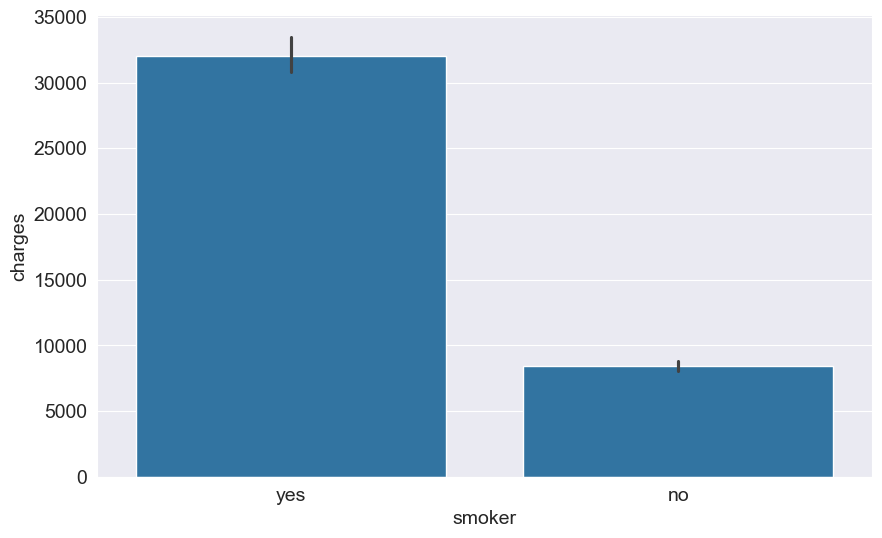

In [86]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [87]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [88]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7872514304984778)

In [89]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [90]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

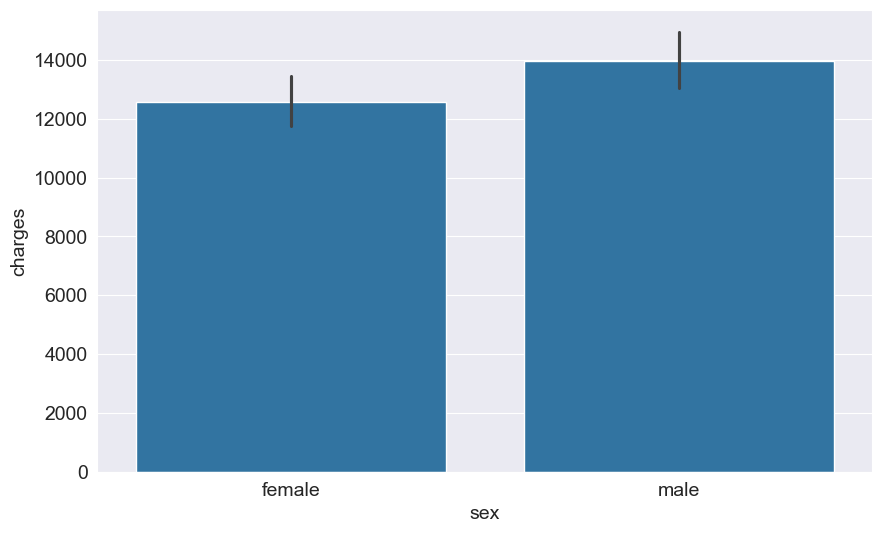

In [91]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [92]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [93]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.05729206220202533)

In [94]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


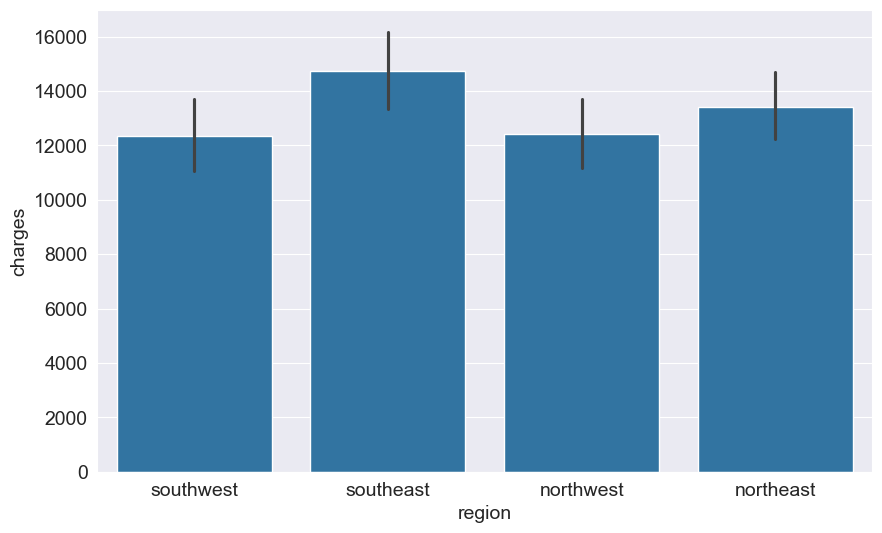

In [95]:
sns.barplot(data=medical_df, x='region', y='charges');

In [96]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [97]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [98]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [99]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [100]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


(np.float64(8434.268297856204), np.float64(7345.4053))

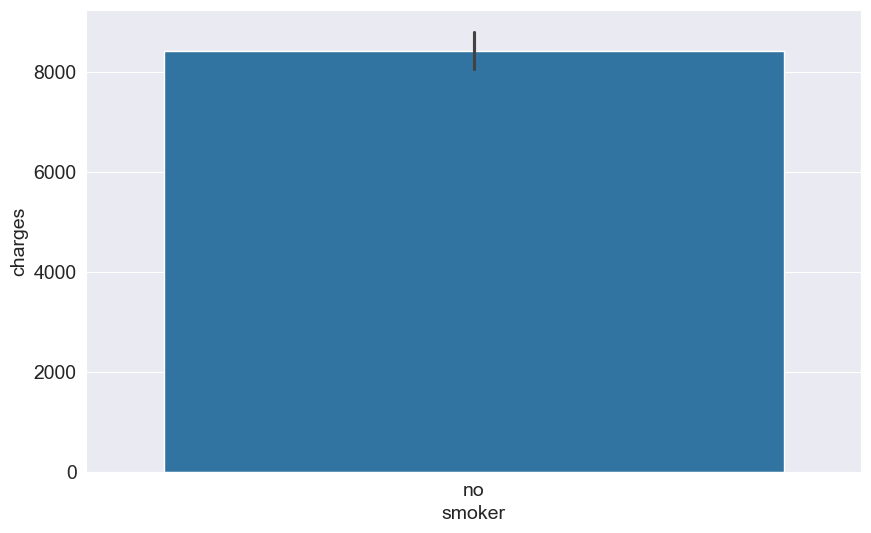

In [101]:
sns.barplot(data=non_smoker_df, x = 'smoker', y = 'charges');
non_smoker_df.charges.mean(), non_smoker_df.charges.median()

(np.float64(32050.23183153284), np.float64(34456.348450000005))

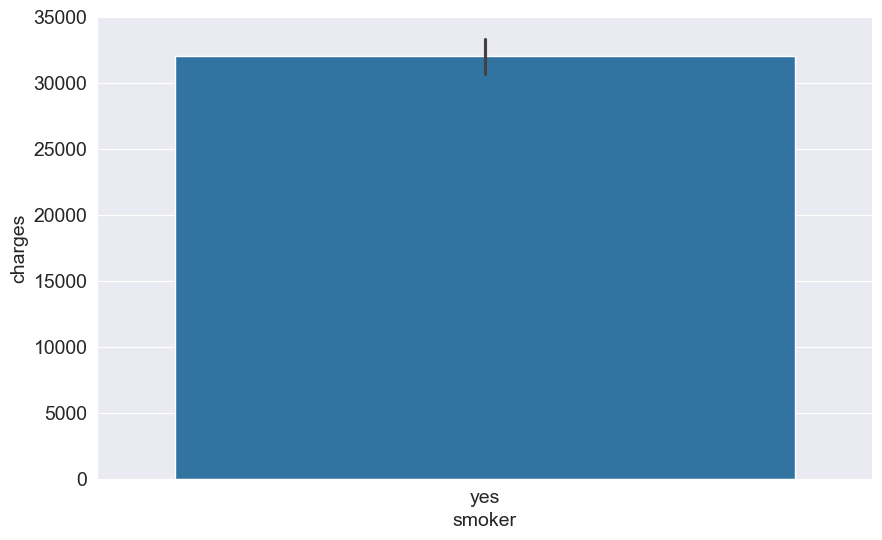

In [102]:
sns.barplot(data=smoker_df, x = 'smoker', y = 'charges');
smoker_df.charges.mean(), smoker_df.charges.median()

In [103]:
model.coef_, model.intercept_

(array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 np.float64(-12525.54781119545))

In [104]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [107]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [108]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [109]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [110]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [111]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [112]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [115]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5477.170015816113


In [116]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6102.586511276536


In [117]:
new_cust = [[25, 19, 0, 0, 1, 0,0,1,0,0]]

In [118]:
scaler.transform([[28,19,0]])

c:\Users\idree\Desktop\sklearn\env\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -1.91331587, -0.90861367]])

In [119]:
model.predict([[-0.79795355, -1.91331587, -0.90861367,0, 0,0,1,0,0]])

array([1245.52503633])